In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Smart Loan Recovery System.csv')

In [3]:
df.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

In [5]:
model=df.drop(columns=['Borrower_ID', 'Loan_ID'])

In [6]:
model

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,59,Male,Salaried,215422,0,1445796,60,12.39,Home,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,49,Female,Salaried,60893,0,1044620,12,13.47,Auto,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,35,Male,Salaried,116520,1,1923410,72,7.74,Home,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,63,Female,Salaried,140818,2,1811663,36,12.23,Home,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,28,Male,Salaried,76272,1,88578,48,16.13,Personal,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,46,Female,Salaried,248483,1,740796,72,16.59,Personal,0.000000e+00,4.135285e+05,5743.45,Delayed,2,169,Fully Recovered,2,Settlement Offer,No
496,30,Female,Salaried,243590,3,1408126,60,11.03,Personal,0.000000e+00,3.173740e+05,5289.57,Delayed,2,102,Partially Recovered,9,Settlement Offer,No
497,46,Female,Salaried,113864,2,375203,48,9.16,Personal,0.000000e+00,3.300302e+05,6875.63,Delayed,3,140,Fully Recovered,3,Settlement Offer,No
498,54,Male,Salaried,158401,2,1769890,24,11.19,Auto,1.272774e+06,1.565339e+06,65222.46,On-Time,3,9,Partially Recovered,9,Calls,No


In [7]:
model.isnull().sum()

Age                        0
Gender                     0
Employment_Type            0
Monthly_Income             0
Num_Dependents             0
Loan_Amount                0
Loan_Tenure                0
Interest_Rate              0
Loan_Type                  0
Collateral_Value           0
Outstanding_Loan_Amount    0
Monthly_EMI                0
Payment_History            0
Num_Missed_Payments        0
Days_Past_Due              0
Recovery_Status            0
Collection_Attempts        0
Collection_Method          0
Legal_Action_Taken         0
dtype: int64

In [8]:
model.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


In [9]:
model.shape

(500, 19)

###  DETECT & REMOVE OUTLIERS USING IQR METHOD & BOX-PLOT

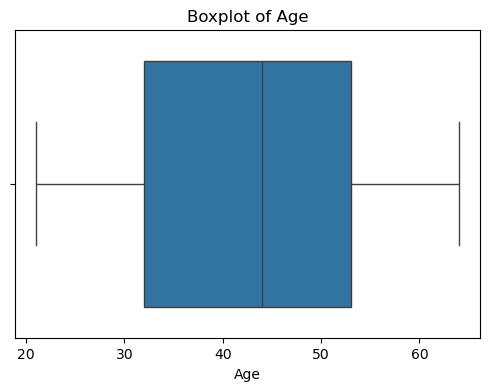

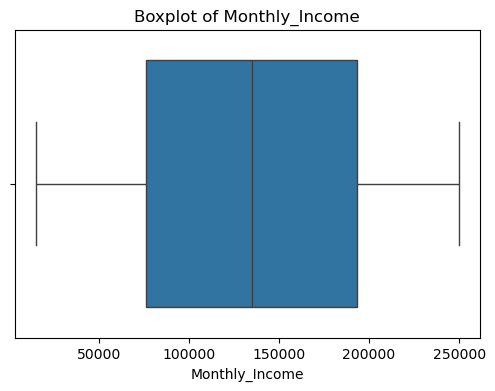

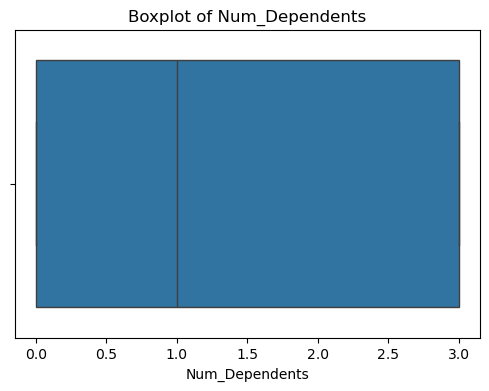

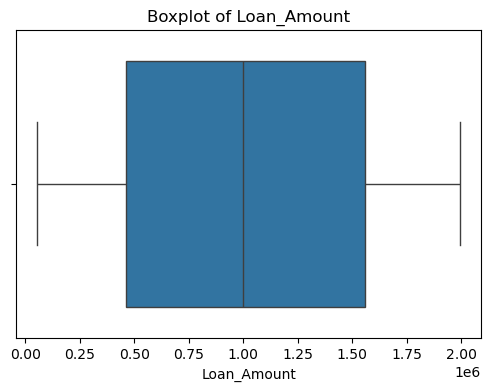

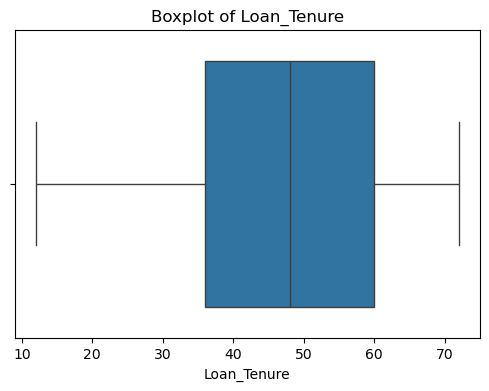

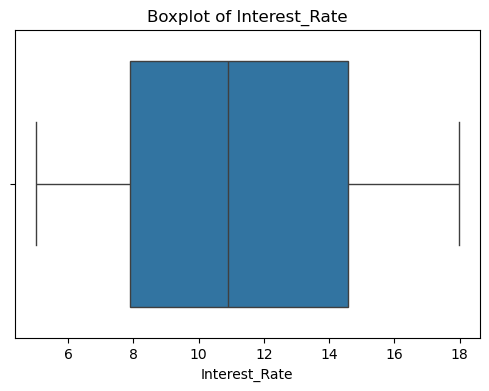

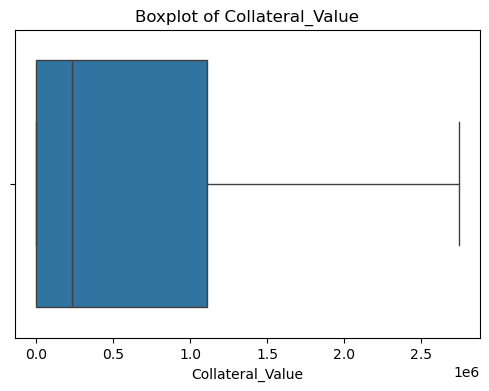

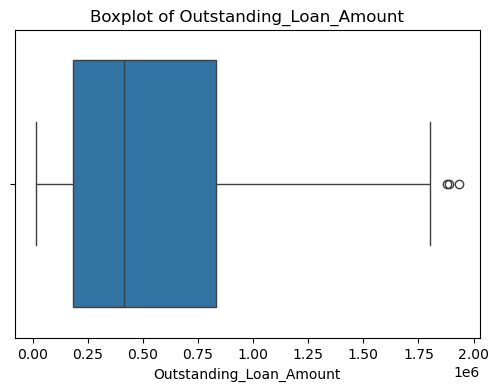

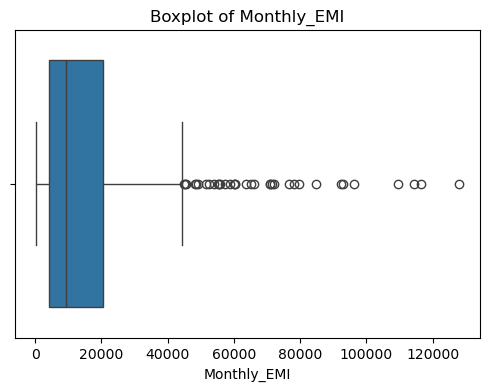

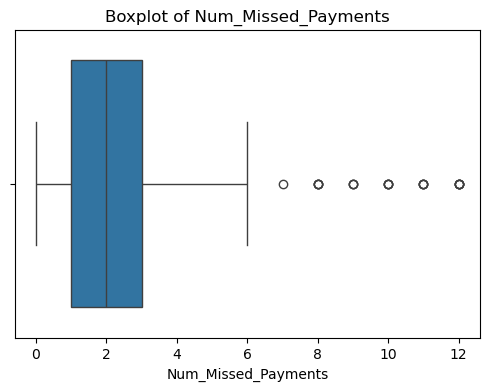

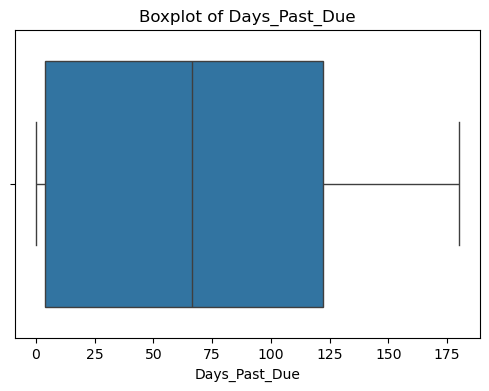

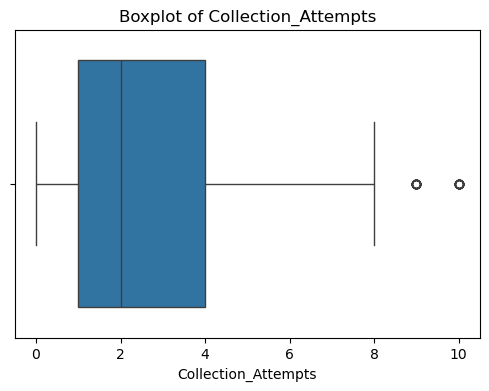

Outliers detected in each numerical column:
Age: 0 outliers
Monthly_Income: 0 outliers
Num_Dependents: 0 outliers
Loan_Amount: 0 outliers
Loan_Tenure: 0 outliers
Interest_Rate: 0 outliers
Collateral_Value: 0 outliers
Outstanding_Loan_Amount: 3 outliers
Monthly_EMI: 35 outliers
Num_Missed_Payments: 21 outliers
Days_Past_Due: 0 outliers
Collection_Attempts: 40 outliers

Shape before removing outliers: (500, 19)
Shape after removing outliers: (409, 19)


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify numerical columns
numerical_cols = model.select_dtypes(include=['int64', 'float64']).columns
model_summary = {}

# Store original shape
original_shape = model.shape

# Step 2: Visualize boxplot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=model[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Step 3: Detect and count outliers
print("Outliers detected in each numerical column:")
for col in numerical_cols:
    Q1 = model[col].quantile(0.25)
    Q3 = model[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = model[(model[col] < lower_bound) | (model[col] > upper_bound)]
    model_summary[col] = outliers.shape[0]
    print(f"{col}: {outliers.shape[0]} outliers")

# Step 4: Remove outliers from the dataset
for col in numerical_cols:
    Q1 = model[col].quantile(0.25)
    Q3 = model[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    model = model[(model[col] >= lower_bound) & (model[col] <= upper_bound)]

# Final output
print("\nShape before removing outliers:", original_shape)
print("Shape after removing outliers:", model.shape)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
categorical_cols = model.select_dtypes(include = 'object').columns

In [14]:
categorical_cols

Index(['Gender', 'Employment_Type', 'Loan_Type', 'Payment_History',
       'Recovery_Status', 'Collection_Method', 'Legal_Action_Taken'],
      dtype='object')

### CATEGORICAL & NUMERICAL VISUALIZATION

In [16]:
import math

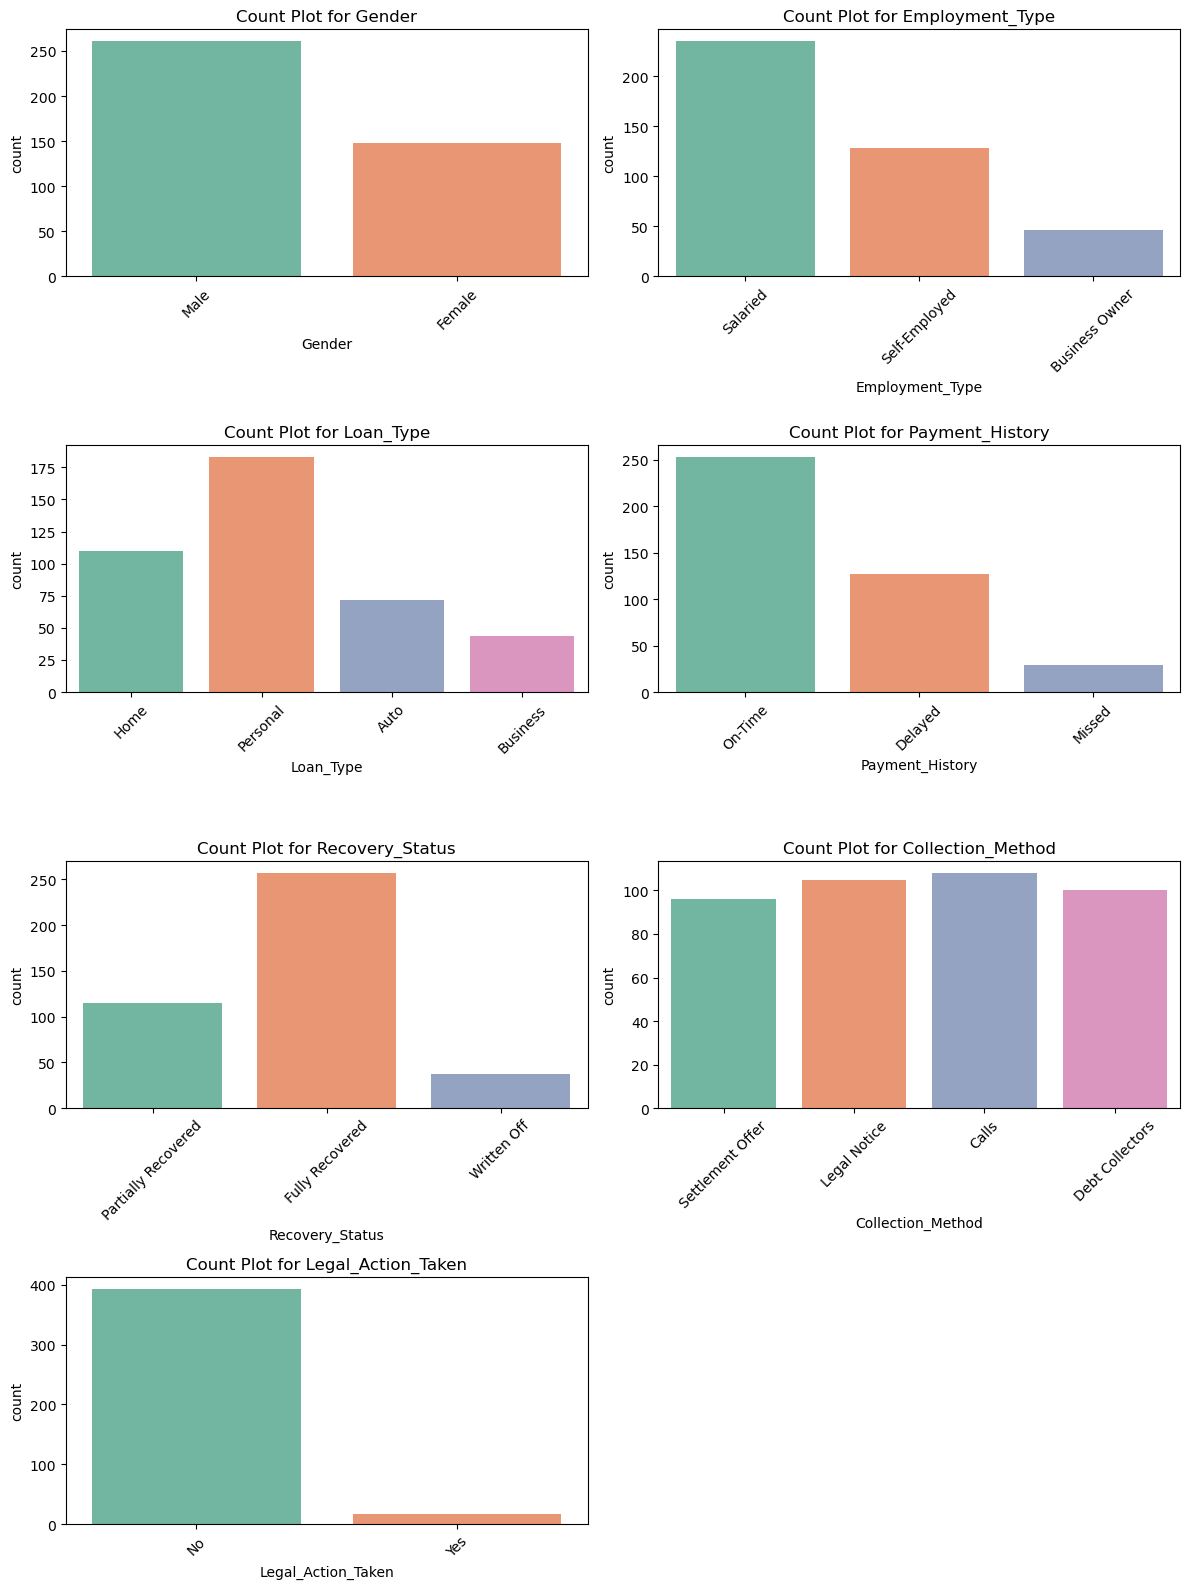

In [17]:
# Set up subplot grid size
n_cols = 2  # Number of plots per row
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()  # Flatten in case of single row

# Plot each count plot
for i, col in enumerate(categorical_cols):
    sns.countplot(data=model, x=col, hue=col, palette='Set2', legend=False, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

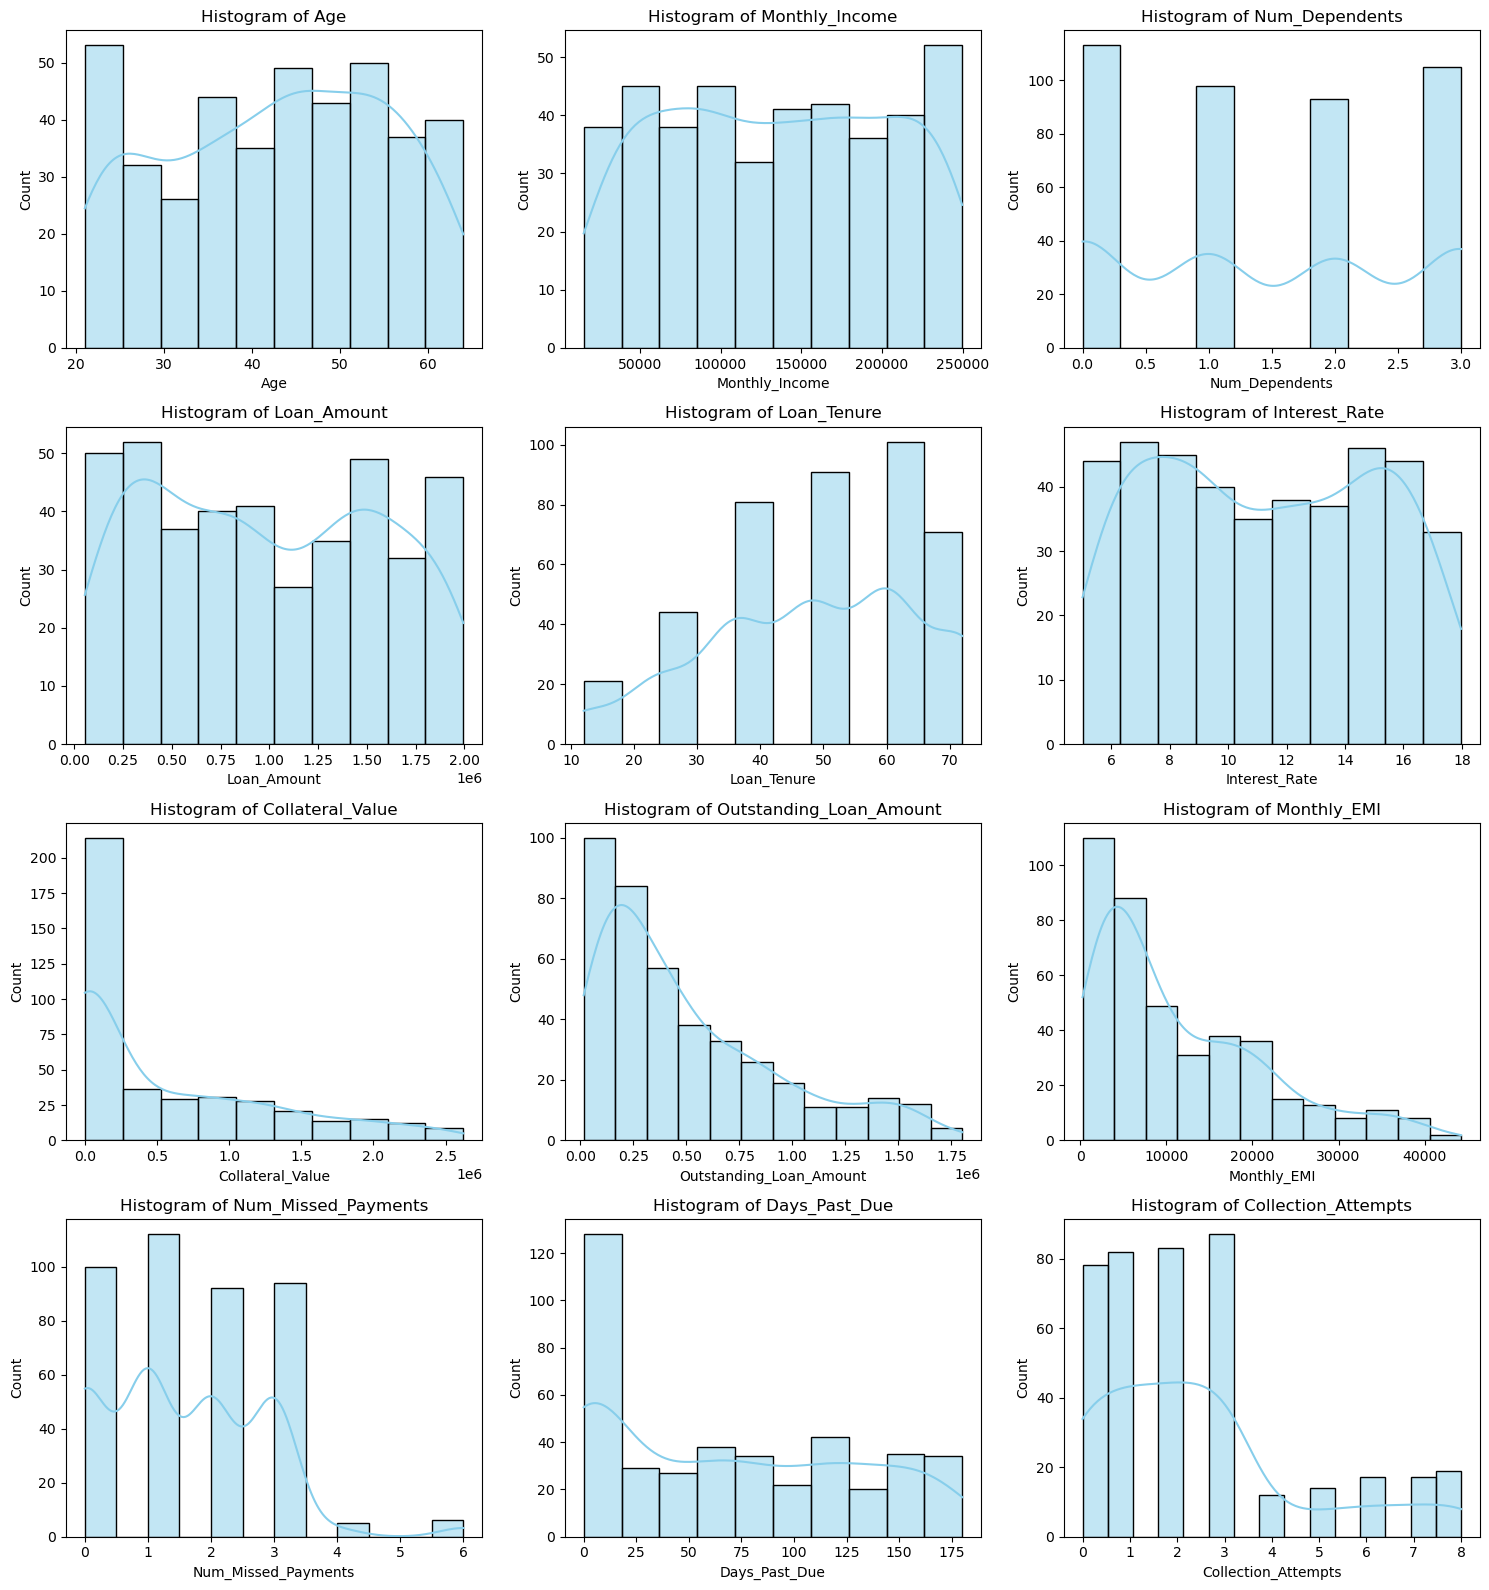

In [18]:
# Determine number of subplots
import math
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # make it 1D for easy indexing

# Plot each histogram
for i, col in enumerate(numerical_cols):
    sns.histplot(data=model, x=col, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Loop through each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    model[col] = le.fit_transform(model[col])
    label_encoders[col] = le
    
    # Print mapping for each column
    print(f"Mapping for '{col}':")
    for i, label in enumerate(le.classes_):
        print(f"  {label} → {i}")
    print("-" * 40)


Mapping for 'Gender':
  Female → 0
  Male → 1
----------------------------------------
Mapping for 'Employment_Type':
  Business Owner → 0
  Salaried → 1
  Self-Employed → 2
----------------------------------------
Mapping for 'Loan_Type':
  Auto → 0
  Business → 1
  Home → 2
  Personal → 3
----------------------------------------
Mapping for 'Payment_History':
  Delayed → 0
  Missed → 1
  On-Time → 2
----------------------------------------
Mapping for 'Recovery_Status':
  Fully Recovered → 0
  Partially Recovered → 1
  Written Off → 2
----------------------------------------
Mapping for 'Collection_Method':
  Calls → 0
  Debt Collectors → 1
  Legal Notice → 2
  Settlement Offer → 3
----------------------------------------
Mapping for 'Legal_Action_Taken':
  No → 0
  Yes → 1
----------------------------------------


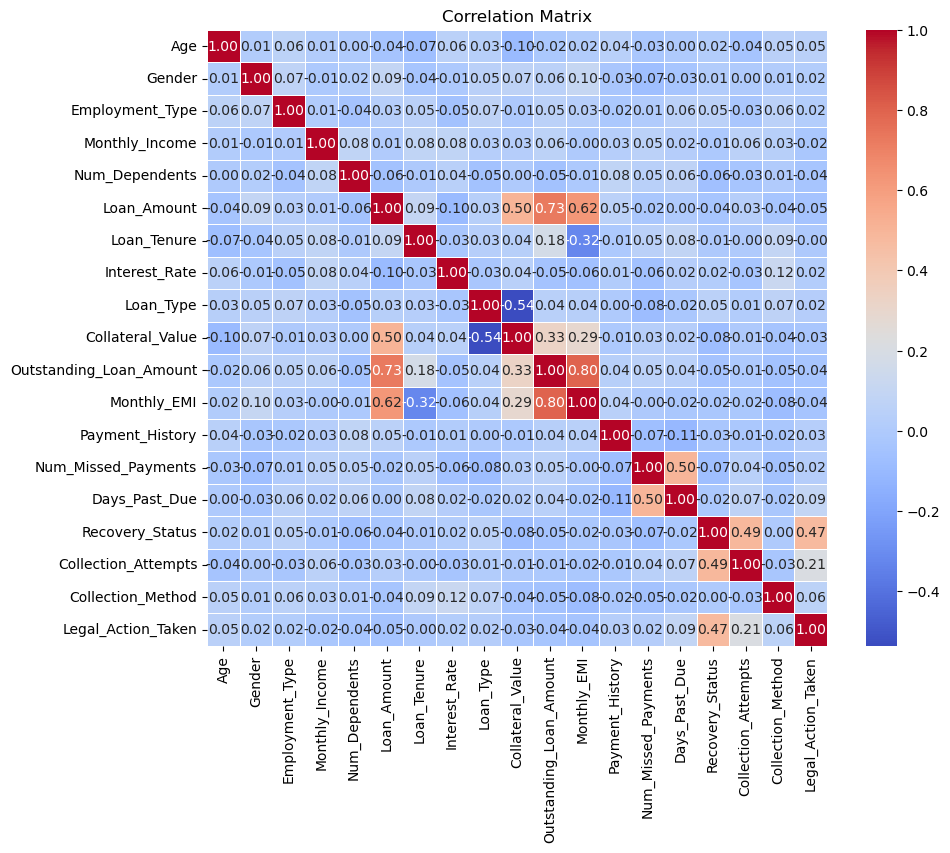

In [20]:
# Compute correlation matrix
corr_matrix = model.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [21]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      409 non-null    int64  
 1   Gender                   409 non-null    int32  
 2   Employment_Type          409 non-null    int32  
 3   Monthly_Income           409 non-null    int64  
 4   Num_Dependents           409 non-null    int64  
 5   Loan_Amount              409 non-null    int64  
 6   Loan_Tenure              409 non-null    int64  
 7   Interest_Rate            409 non-null    float64
 8   Loan_Type                409 non-null    int32  
 9   Collateral_Value         409 non-null    float64
 10  Outstanding_Loan_Amount  409 non-null    float64
 11  Monthly_EMI              409 non-null    float64
 12  Payment_History          409 non-null    int32  
 13  Num_Missed_Payments      409 non-null    int64  
 14  Days_Past_Due            409 no

In [22]:
X = model.drop(columns=['Recovery_Status'])  # Features
y = model['Recovery_Status']   

In [23]:
len(X)

409

In [24]:
len(y)

409

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
len(X_scaled)

409

In [27]:
X_scaled

array([[ 1.28935879,  0.7530271 , -0.32301995, ..., -0.66092334,
         1.37767765, -0.20177331],
       [-0.61184984,  0.7530271 , -0.32301995, ..., -0.20353308,
         0.48185864, -0.20177331],
       [ 1.60622689, -1.32797346, -0.32301995, ..., -0.20353308,
        -1.30977939, -0.20177331],
       ...,
       [ 0.25953745, -1.32797346, -0.32301995, ..., -0.20353308,
         1.37767765, -0.20177331],
       [ 0.25953745, -1.32797346, -0.32301995, ...,  0.25385719,
         1.37767765, -0.20177331],
       [ 1.44779284,  0.7530271 ,  1.28814054, ...,  1.62602798,
         1.37767765,  4.9560569 ]])

In [28]:
import pandas as pd

# Assuming you have a dataframe `df` and the target column is 'class'
class_counts = model['Recovery_Status'].value_counts()

# Display the counts of each class
print("Class distribution:\n", class_counts)

# Check if the dataset is balanced or imbalanced
total_samples = len(model)
print(f"Total samples: {total_samples}")
imbalanced = class_counts.max() / class_counts.min()

if imbalanced > 2:  # You can adjust this threshold based on your context
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")


Class distribution:
 Recovery_Status
0    257
1    115
2     37
Name: count, dtype: int64
Total samples: 409
The dataset is imbalanced.


In [29]:
from imblearn.over_sampling import SMOTE

# Assuming 'X' is your features and 'y' is your target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())

Resampled class distribution:
 Recovery_Status
1    257
0    257
2    257
Name: count, dtype: int64


In [30]:
len(X_resampled)

771

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [32]:
len(X_train)

616

In [33]:
len(X_test)

155

In [34]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = model_rf.predict(X_test)

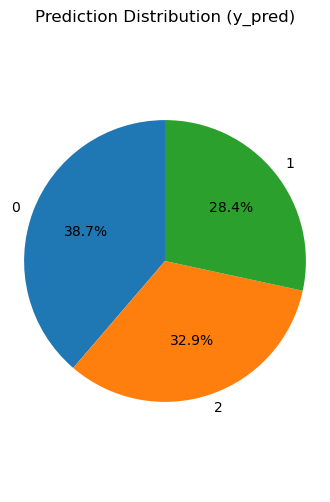

In [36]:
y_pred_series = pd.Series(y_pred)

# Count values of each predicted class
prediction_counts = y_pred_series.value_counts()

# Plot pie chart
plt.figure(figsize=(4, 6))
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Prediction Distribution (y_pred)')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9032258064516129


In [38]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[56  5  0]
 [ 4 38  5]
 [ 0  1 46]]


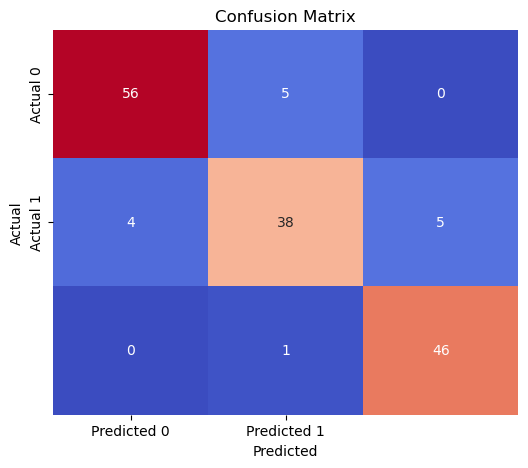

In [39]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        61
           1       0.86      0.81      0.84        47
           2       0.90      0.98      0.94        47

    accuracy                           0.90       155
   macro avg       0.90      0.90      0.90       155
weighted avg       0.90      0.90      0.90       155



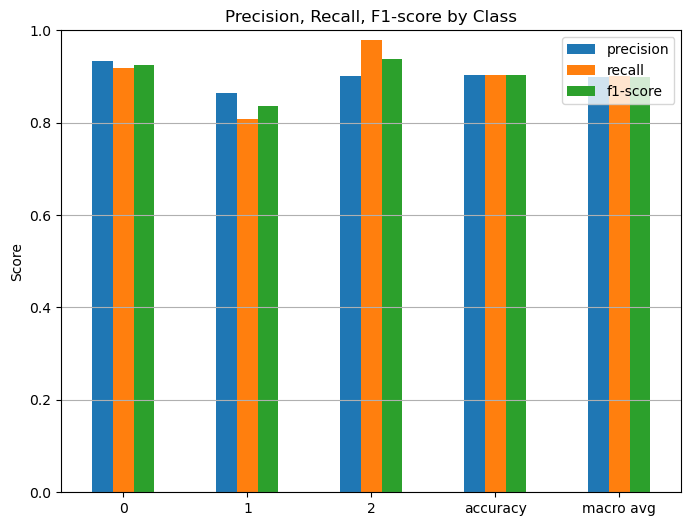

In [41]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Optional: Plot key metrics only
metrics_to_plot = report_df.iloc[:-1][['precision', 'recall', 'f1-score']]

metrics_to_plot.plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, F1-score by Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

#### HYPERPARAMETER TUNING 

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   scoring='accuracy',
                                   random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 149}
Best score: 0.8376868607395753


In [44]:
import joblib

In [45]:
joblib.dump(model_rf, 'loan_default_model.joblib')
print("✅ Model saved as 'loan_default_model.joblib'")

✅ Model saved as 'loan_default_model.joblib'


In [46]:
# Save the dictionary of label encoders to a file
joblib.dump(label_encoders, "label_encoders.joblib")
print("✅ Label encoders saved as 'label_encoders.joblib'")

✅ Label encoders saved as 'label_encoders.joblib'


In [47]:
model.head()

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,59,1,1,215422,0,1445796,60,12.39,2,1.727997e+06,2.914130e+05,4856.88,2,0,0,1,1,3,0
2,35,1,1,116520,1,1923410,72,7.74,2,2.622540e+06,1.031372e+06,14324.61,0,2,124,0,2,2,0
3,63,0,1,140818,2,1811663,36,12.23,2,1.145493e+06,2.249739e+05,6249.28,2,1,56,0,2,0,0
4,28,1,1,76272,1,88578,48,16.13,3,0.000000e+00,3.918989e+04,816.46,2,1,69,0,0,1,0
5,41,1,1,238224,3,664741,36,15.86,0,9.822146e+05,1.299655e+05,3610.15,2,1,111,1,6,2,0


In [48]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      409 non-null    int64  
 1   Gender                   409 non-null    int32  
 2   Employment_Type          409 non-null    int32  
 3   Monthly_Income           409 non-null    int64  
 4   Num_Dependents           409 non-null    int64  
 5   Loan_Amount              409 non-null    int64  
 6   Loan_Tenure              409 non-null    int64  
 7   Interest_Rate            409 non-null    float64
 8   Loan_Type                409 non-null    int32  
 9   Collateral_Value         409 non-null    float64
 10  Outstanding_Loan_Amount  409 non-null    float64
 11  Monthly_EMI              409 non-null    float64
 12  Payment_History          409 non-null    int32  
 13  Num_Missed_Payments      409 non-null    int64  
 14  Days_Past_Due            409 no